#Normal and Lognormal Fits to Income Data

##General Code

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani
import scipy as sp

In [2]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [3]:
pysentani.similar_columns(survey,'income')

group_income_reg/electric_income
group_income_reg/electric_income_freq
electric_income_y_n
group_electric_income/electric_income_desc
group_electric_income/electric_income
group_electric_income/electric_income_freq


##Establish Necessary Columns

In [4]:
survey['incomefreq'] = pysentani.income_monthly(survey)

survey['incomefreq'] = survey['incomefreq'].dropna().replace(0, 1) 
#This prevents the log_incomefreq and ln_incomefreq columns from containing null or inf values 

survey['access_type'] = pysentani.access_type(survey)

survey['log_incomefreq'] = np.log10(survey['incomefreq'])
survey['ln_incomefreq'] = np.log(survey['incomefreq'])

##Normal Fit / KDE Plot Comparison 

Normal Probability Density Function (PDF) Fit Equation
$$ \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Python Code for Equation (Multiplication Escaped with '\'):  y = np.exp(((-(x-mean_log)\*\*2)/(2\*(std_log)\*\*2)))/(np.sqrt(2\*np.pi)\*std_log)

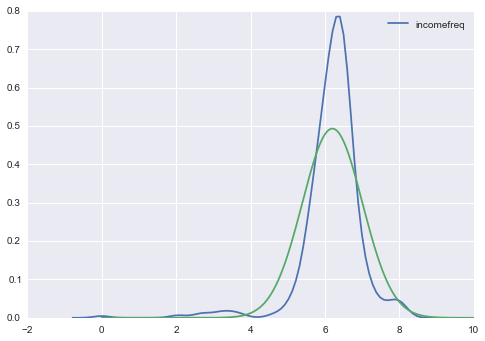

In [5]:
mean_log = survey['log_incomefreq'].mean()
std_log = survey['log_incomefreq'].std()

x=np.linspace(0,10,1000) #np.linspace(lowerXBound, upperXBound, #ofDataPoints)

graph = sns.kdeplot(data=np.log10(survey['incomefreq'].dropna())) #KDE plot shown in blue

income_norm=sp.stats.norm(scale=std_log,loc=mean_log) 
#For normal fit, scale coresponds to standard deviation (sigma), and location corresponds to mean (mu)

graph.plot(x,income_norm.pdf(x)) #Normal fit curve shown in green

Lognormal Probability Density Function (PDF) Equation
$$ \frac{1}{x\sigma\sqrt{2\pi}}\ e^{-\frac{\left(\ln x-\mu\right)^2}{2\sigma^2}} $$

Python Code for Equation (Multiplication Escaped with '\'):   y = np.exp((-(np.log(x)-mean)\*\*2)/(stddev\*np.sqrt(2)))/((x\*stddev)\*np.sqrt(2\*np.pi))

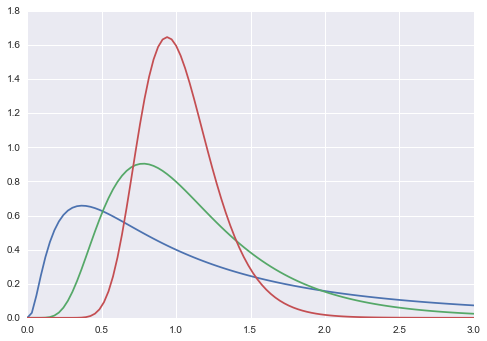

In [6]:
x=np.linspace(0,3,100) 
blue_match = sp.stats.lognorm(s=1,loc=0,scale=np.exp(0)) #Standard deviation (s) = 1, mean = 1 (or np.exp(0))
plt.plot(x,blue_match.pdf(x))
green_match = sp.stats.lognorm(s=.5,loc=0,scale=np.exp(0)) #Standard deviation (s) = 0.5, mean = 1 (or np.exp(0))
plt.plot(x,green_match.pdf(x))
red_match = sp.stats.lognorm(s=0.25,loc=0,scale=np.exp(0)) #Standard deviation (s) = 0.25, mean = 1 (or np.exp(0))
plt.plot(x,red_match.pdf(x))

#From what I can tell, location represents horizontal shift.

Helpful Stack Overflow Page for clarifying Lognormal parameters

http://stackoverflow.com/questions/28700694/log-normal-random-variables-with-scipy

As is apparent from the Wikipedia graphs, the scale parameter corresponds directly with the mean, which is not the same as the symbol mu - at least not in the Wikipedia notation.  It is clear in all three graphs that the mean is not zero (the value of mu) but one, the value obtained by raising e to the mu, as instructed by both the Wikipedia article and the Stack Overflow article above.   

(0, 3e-07)

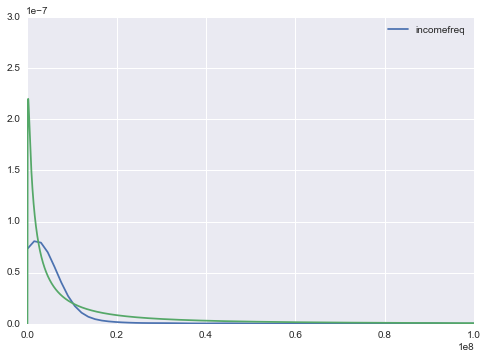

In [7]:
graph = sns.kdeplot(data=(survey['incomefreq'].dropna())) #KDE plot in blue

mean = survey['incomefreq'].mean()

stddev = survey['ln_incomefreq'].std()

dist=sp.stats.lognorm(s=stddev,scale=mean) 

x=np.linspace(0,1e8,10000)

plt.plot(x,dist.pdf(x)) #Lognormal distribution shown in green

graph.set_xlim((0, 1e8))
graph.set_ylim((0,3e-7))